Impacto Global da Agricultura no Clima

Esta analise tem como intuito fins educativos para análise de dados, com base no meus conhecimentos de Python.

In [1]:
#instalar bibliotecas
!pip install pandas numpy matplotlib seaborn scipy scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Carregar os Dados

In [3]:
df = pd.read_csv('C:\\Users\\jpedr\\Desktop\\Projetos de Dados\\climate_change_impact_on_agriculture_2024.csv')

Visualização dos dados

5 primeiras linhas

In [4]:

print(df.head())

print(df.describe()) #colunas

print(df.info()) # dados e valores nulos


   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

Limpar dados

In [5]:
df = df.drop_duplicates()  #remover duplicatas

print(df.isnull().sum()) #valores nulos


Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


Análise Exploratória

Aqui focarei no Brasil

In [6]:
df_brazil = df.loc[df['Country'] == 'Brazil']
df_brazil = df_brazil.drop(columns=['Region'])
#imprimir Brasil
print(df_brazil)

      Year Country   Crop_Type  Average_Temperature_C  Total_Precipitation_mm  \
16    2018  Brazil      Barley                  20.83                 2639.04   
18    1997  Brazil        Rice                  17.45                 1634.32   
27    2011  Brazil        Corn                  15.75                 1433.31   
36    2015  Brazil   Sugarcane                  14.69                  804.11   
37    2008  Brazil      Fruits                   5.64                 2780.22   
...    ...     ...         ...                    ...                     ...   
9950  2012  Brazil  Vegetables                  14.82                 2275.62   
9960  1991  Brazil       Wheat                  28.03                  407.81   
9980  2015  Brazil       Wheat                  29.62                  629.33   
9981  2015  Brazil        Corn                  33.02                  293.46   
9998  1996  Brazil    Soybeans                  13.95                 1549.52   

      CO2_Emissions_MT  Cro

Exploração dos Dados

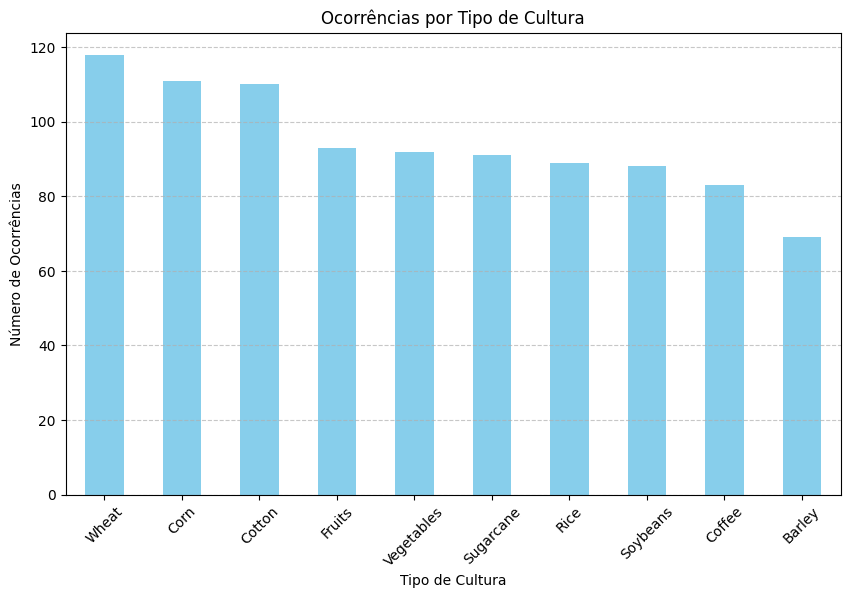

In [7]:
# Gráfico de barras de cultivos'
plt.figure(figsize=(10, 6))
df_brazil['Crop_Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Ocorrências por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pré-processamento dos dados para soja

In [8]:
df_brazil['Crop_Type_numeric'] = pd.to_numeric(df_brazil['Crop_Type'], errors='coerce')

df_brazil

,Year,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Crop_Type_numeric
16,2018,Brazil,Barley,20.83,2639.04,6.01,3.640,10,52.71,28.15,61.34,88.14,Drought-resistant Crops,521.59,NaN
18,1997,Brazil,Rice,17.45,1634.32,29.55,2.754,5,29.84,48.57,3.21,30.18,No Adaptation,1323.81,NaN
27,2011,Brazil,Corn,15.75,1433.31,11.91,2.080,6,79.20,25.19,67.56,55.03,Organic Farming,933.72,NaN
36,2015,Brazil,Sugarcane,14.69,804.11,23.52,4.248,1,75.67,1.73,78.02,49.80,No Adaptation,1581.37,NaN
37,2008,Brazil,Fruits,5.64,2780.22,20.22,0.477,5,81.71,27.63,15.30,39.42,Drought-resistant Crops,205.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,2012,Brazil,Vegetables,14.82,2275.62,15.97,1.557,10,23.71,49.76,64.28,76.35,Organic Farming,343.29,NaN
9960,1991,Brazil,Wheat,28.03,407.81,6.74,0.891,3,87.05,18.58,54.93,77.36,No Adaptation,415.97,NaN
9980,2015,Brazil,Wheat,29.62,629.33,12.02,1.880,9,29.06,47.85,74.86,47.09,Organic Farming,858.14,NaN
9981,2015,Brazil,Corn,33.02,293.46,18.22,3.051,8,78.94,9.36,84.02,76.51,Crop Rotation,510.45,NaN


In [9]:
df_soybeans = df_brazil[df_brazil['Crop_Type'] == 'Soybeans']
df_soybeans

,Year,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Crop_Type_numeric
49,2007,Brazil,Soybeans,10.27,2913.02,29.03,1.584,1,80.98,25.20,92.15,90.27,No Adaptation,476.68,NaN
88,2016,Brazil,Soybeans,32.37,1103.04,22.53,1.404,1,66.03,7.04,47.21,56.97,Water Management,366.94,NaN
224,2017,Brazil,Soybeans,33.18,2917.84,17.54,3.501,1,15.28,26.14,91.81,64.77,Water Management,1181.03,NaN
374,2006,Brazil,Soybeans,27.23,2224.63,1.16,2.180,7,54.40,25.51,3.63,43.70,Water Management,865.63,NaN
488,2014,Brazil,Soybeans,29.22,267.79,21.12,1.188,5,19.43,44.06,71.56,39.76,Crop Rotation,578.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,2007,Brazil,Soybeans,27.70,897.72,1.01,3.050,1,78.19,7.82,96.73,91.85,Drought-resistant Crops,1063.05,NaN
9840,2020,Brazil,Soybeans,14.74,1324.22,9.12,3.540,0,26.93,38.53,13.29,44.91,Water Management,1736.74,NaN
9873,2011,Brazil,Soybeans,31.33,729.93,20.68,0.855,9,20.70,21.79,18.64,57.21,Drought-resistant Crops,332.99,NaN
9946,1991,Brazil,Soybeans,22.22,1418.63,29.73,3.204,1,50.90,1.27,35.11,35.88,Organic Farming,1140.37,NaN


Soja

In [10]:
df_soybeans = df_soybeans.drop_duplicates() #drop de duplicados

In [11]:
print(df_soybeans.isnull().sum()) #verificar valores 

Year                            0
Country                         0
Crop_Type                       0
Average_Temperature_C           0
Total_Precipitation_mm          0
CO2_Emissions_MT                0
Crop_Yield_MT_per_HA            0
Extreme_Weather_Events          0
Irrigation_Access_%             0
Pesticide_Use_KG_per_HA         0
Fertilizer_Use_KG_per_HA        0
Soil_Health_Index               0
Adaptation_Strategies           0
Economic_Impact_Million_USD     0
Crop_Type_numeric              88
dtype: int64


In [12]:
# Converter colunas para tipos apropriados, se necessário
df_soybeans['Year'] = pd.to_numeric(df_soybeans['Year'], errors='coerce')
df_soybeans['Average_Temperature_C'] = pd.to_numeric(df_soybeans['Average_Temperature_C'], errors='coerce')
df_soybeans['Total_Precipitation_mm'] = pd.to_numeric(df_soybeans['Total_Precipitation_mm'], errors='coerce')
df_soybeans['CO2_Emissions_MT'] = pd.to_numeric(df_soybeans['CO2_Emissions_MT'], errors='coerce')
df_soybeans['Crop_Yield_MT_per_HA'] = pd.to_numeric(df_soybeans['Crop_Yield_MT_per_HA'], errors='coerce')
df_soybeans['Extreme_Weather_Events'] = df_soybeans['Extreme_Weather_Events'].astype(str) # Se for categórico
df_soybeans['Irrigation_Access_%'] = pd.to_numeric(df_soybeans['Irrigation_Access_%'], errors='coerce')
df_soybeans['Pesticide_Use_KG_per_HA'] = pd.to_numeric(df_soybeans['Pesticide_Use_KG_per_HA'], errors='coerce')
df_soybeans['Fertilizer_Use_KG_per_HA'] = pd.to_numeric(df_soybeans['Fertilizer_Use_KG_per_HA'], errors='coerce')
df_soybeans['Soil_Health_Index'] = pd.to_numeric(df_soybeans['Soil_Health_Index'], errors='coerce')
df_soybeans['Economic_Impact_Million_USD'] = pd.to_numeric(df_soybeans['Economic_Impact_Million_USD'], errors='coerce')


In [13]:
#Nomalizar os dados

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar dados numéricos
scaler = MinMaxScaler()
df_soybeans[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
             'Crop_Yield_MT_per_HA', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 
             'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']] = \
    scaler.fit_transform(df_soybeans[['Average_Temperature_C', 'Total_Precipitation_mm', 
                                      'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 
                                      'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 
                                      'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 
                                      'Economic_Impact_Million_USD']])


Exploração de dados da Soja

<function matplotlib.pyplot.show(close=None, block=None)>

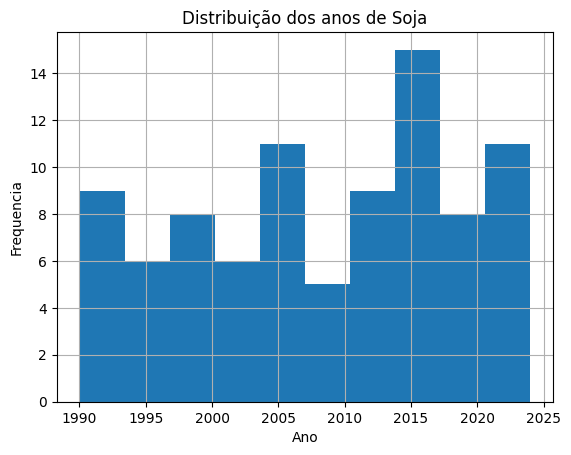

In [14]:
#Histograma

df_soybeans['Year'].hist(bins=10)
plt.title('Distribuição dos anos de Soja')
plt.xlabel('Ano')
plt.ylabel('Frequencia')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

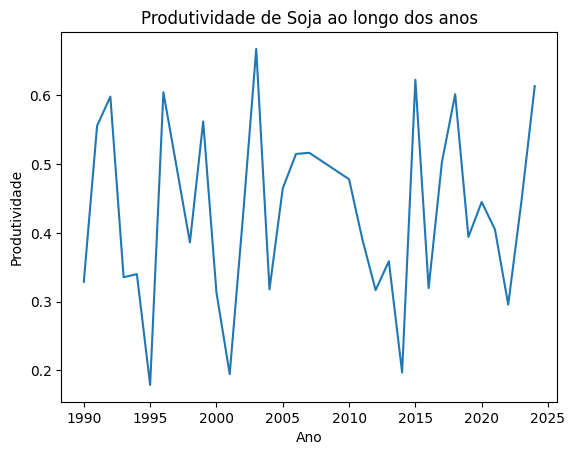

In [15]:
#produtividade

df_soybeans.groupby('Year')['Crop_Yield_MT_per_HA'].mean().plot(kind='line')
plt.title('Produtividade de Soja ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Produtividade')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

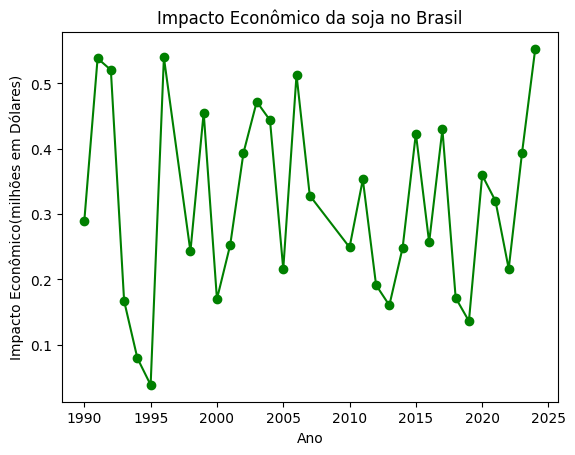

In [16]:
#calculo da média do impacto econômico
df_impact_yearly = df_soybeans.groupby('Year')['Economic_Impact_Million_USD'].mean().reset_index()

#gráfico
plt.plot(df_impact_yearly['Year'], df_impact_yearly['Economic_Impact_Million_USD'], marker= 'o', color = 'green')
plt.title('Impacto Econômico da soja no Brasil')
plt.xlabel('Ano')
plt.ylabel('Impacto Econômico(milhões em Dólares)')
plt.show

Autor: João Pedro Marques

link dos dados: https://www.kaggle.com/datasets/talhachoudary/global-agriculture-climate-impact-dataset/data